=== Problem 1: Coin Toss Simulation ===
Heads: 5012, Tails: 4988
Experimental P(heads) = 0.5012, P(tails) = 0.4988
Theoretical P = 0.5 each

=== Problem 2: Dice Roll Simulation ===
Dice counts: Counter({4: 8502, 3: 8401, 5: 8342, 1: 8275, 2: 8245, 6: 8235})
P(even) = 0.4996, P(>4) = 0.3315


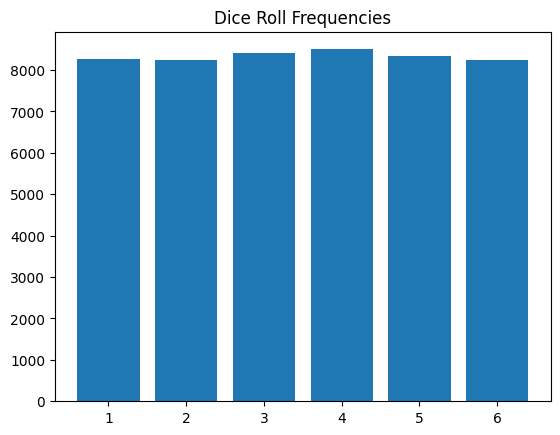

=== Problem 3: Poisson Emails Simulation ===
Experimental P(X>=3) = 0.3270
Theoretical  P(X>=3) = 0.3233

=== Problem 4: Uniform Distribution Simulation ===
P(2 <= X <= 5) = 0.2993
P(X > 7) = 0.3029
Experimental mean = 5.0384, Theoretical mean = 5.0

=== Problem 5: Conditional Probability Simulation ===
P(spam | 'free') = 0.3023

=== Problem 6: Expected Value & Variance of Dice Sums ===
Experimental mean = 7.0080, Variance = 5.8152
Theoretical mean = 7, Variance ≈ 5.833


In [ ]:
# Week 1: Probability & Distributions 
import random
from collections import Counter
import numpy as np
import math
import matplotlib.pyplot as plt

print("=== Problem 1: Coin Toss Simulation ===")
# Simulate 10,000 coin tosses
n_tosses = 10000
coins = [random.choice(['H', 'T']) for _ in range(n_tosses)]
counts = Counter(coins)
p_heads = counts['H'] / n_tosses
p_tails = counts['T'] / n_tosses
print(f"Heads: {counts['H']}, Tails: {counts['T']}")
print(f"Experimental P(heads) = {p_heads:.4f}, P(tails) = {p_tails:.4f}")
print(f"Theoretical P = 0.5 each\n")

print("=== Problem 2: Dice Roll Simulation ===")
# Simulate 50,000 dice rolls
n_rolls = 50000
dice_rolls = [random.randint(1,6) for _ in range(n_rolls)]
dice_counts = Counter(dice_rolls)
p_even = sum(dice_counts[i] for i in [2,4,6]) / n_rolls
p_gt4 = sum(dice_counts[i] for i in [5,6]) / n_rolls
print(f"Dice counts: {dice_counts}")
print(f"P(even) = {p_even:.4f}, P(>4) = {p_gt4:.4f}")

# Optional: plot bar chart
plt.bar(dice_counts.keys(), dice_counts.values())
plt.title("Dice Roll Frequencies")
plt.show()

print("=== Problem 3: Poisson Emails Simulation ===")
lambda_val = 2
emails = np.random.poisson(lambda_val, 1000)
p_X_ge3_exp = np.sum(emails >= 3) / 1000
# Theoretical P(X>=3) = 1 - P(X<3) = 1 - P(0)-P(1)-P(2)
p_X_ge3_theory = 1 - sum(math.exp(-lambda_val)*lambda_val**k / math.factorial(k) for k in [0,1,2])
print(f"Experimental P(X>=3) = {p_X_ge3_exp:.4f}")
print(f"Theoretical  P(X>=3) = {p_X_ge3_theory:.4f}\n")

print("=== Problem 4: Uniform Distribution Simulation ===")
samples = np.random.uniform(0,10,10000)
p_2_5 = np.sum((samples >= 2) & (samples <= 5)) / 10000
p_gt7 = np.sum(samples > 7) / 10000
mean_exp = np.mean(samples)
print(f"P(2 <= X <= 5) = {p_2_5:.4f}")
print(f"P(X > 7) = {p_gt7:.4f}")
print(f"Experimental mean = {mean_exp:.4f}, Theoretical mean = 5.0\n")

print("=== Problem 5: Conditional Probability Simulation ===")
# Simulate 10,000 emails
n_emails = 10000
emails = []
labels = []
words = ["free","money","hello"]
for _ in range(n_emails):
    label = random.choices([1,0], weights=[0.3,0.7])[0]  # 1=spam, 0=ham
    n_words = random.randint(1,3)
    email_words = random.sample(words, n_words)
    emails.append(email_words)
    labels.append(label)
# Compute P(spam | "free")
emails_with_free = [i for i,w in enumerate(emails) if "free" in w]
if len(emails_with_free) > 0:
    spam_given_free = sum(labels[i] for i in emails_with_free) / len(emails_with_free)
else:
    spam_given_free = 0
print(f"P(spam | 'free') = {spam_given_free:.4f}\n")

print("=== Problem 6: Expected Value & Variance of Dice Sums ===")
rolls = [(random.randint(1,6) + random.randint(1,6)) for _ in range(50000)]
mean_sum = np.mean(rolls)
var_sum = np.var(rolls)
print(f"Experimental mean = {mean_sum:.4f}, Variance = {var_sum:.4f}")
print(f"Theoretical mean = 7, Variance ≈ 5.833")
